import necessary packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import copy
import seaborn as sns
from sklearn.linear_model import LogisticRegression 

In [4]:
df = pd.read_csv('./archive/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# filas - columnas (revisando que cumpla la condicion de data del prof)
df.shape

(60000, 785)

In [6]:
#aquí vamos a utilizar la función reset index de pandas en el dataframe. si el dataframe tiene un multiindex, este método puede eliminar uno o más niveles y luego aplicar la función comprobando la forma del dataframe
df = df.sample(frac=0.3).reset_index(drop=True)
df.shape

(18000, 785)

In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,137,130,125,95,0,0,1,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
3,0,0,0,0,0,0,1,1,0,0,...,134,148,141,16,0,1,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,0,0


In [8]:
Lookup = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [9]:
def display_image(features, actual_labels):
    print("Actual label", Lookup[actual_labels])
    
    plt.imshow(features.reshape(28,28))

In [10]:
X = df[df.columns[1:]]
Y = df["label"]

In [12]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,21,...,137,130,125,95,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,134,148,141,16,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,0,0


In [13]:
Y.head()

0    7
1    0
2    8
3    0
4    6
Name: label, dtype: int64

In [14]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        74, 133,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         0,  96, 143,   0, 127,  93,   0,   3,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 161,   0,   0,   0, 146,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   9,   0,  55,  90,   0,   0,   0])

In [15]:
Y.loc[5]

8

Actual label Bag


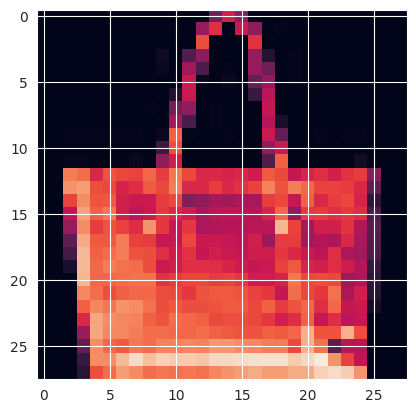

In [16]:
display_image(X.loc[5].values, Y.loc[5])

In [17]:
X = X/225.
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.004444,0.000000,0.0,0.0,0.093333,...,0.608889,0.577778,0.555556,0.422222,0.0,0.000000,0.004444,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.022222,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.004444,0.004444,0.0,0.0,0.000000,...,0.595556,0.657778,0.626667,0.071111,0.0,0.004444,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.080000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [19]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

In [20]:
x_test.shape, y_test.shape

((3600, 784), (3600,))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


#definiendo una funcion para resumir la clasificacion de la prediccion la aproximacion a partir de varios factores
def summarize_classification(y_test, y_pred, avg_method = "weighed"):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=True)
    
    prec = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    
    print("Test data count: ", len(y_test))
    print("Accuracy_count: ", num_acc)
    print("accuracy_score: ", acc)
    print("precision_score: ", prec)
    print("recall_score: ", recall)

In [23]:
logistic_model = LogisticRegression(solver="sag", multi_class="auto", max_iter=1000).fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = logistic_model.predict(x_test)

y_pred

In [ ]:
summarize_classification(y_test, y_pred)